# Ecuaciones Diferenciales Parciales (PDEs)

### Método de relajación de Jacobi modificado (*over-relaxation*)

Existe una forma de mejorar el método de Jacobi para converger con menos iteraciones. Este método es el método de Jacobi modificado, en el cual en lugar de tomar pasos pequeños entre cada iteración, incrementamos con un parámetro $\omega$ el tamaño del incremento que realizamos. Con esta modificación, el método de Jacobi modificado toma la forma 
$$
\phi'(x, y) = (1+\omega)\left[\frac{\phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a)}4\right] - \omega \phi (x,y).
$$
* Cuando funciona, usualmente reduce el número de iteraciones necesarias para obtener la aproximación
* **No siempre es estable**, depende de como se escoja el parámetro $\omega$
* En general, se debe considerar un parámetro $\omega$ que depende del problema para acelerar el cálculo

Realicemos el cálculo con un valor $V = 1$, $M = 100$ y toleracia de $10^{-5}$:

Se detuvo después de 2 iteraciones debido a un límite máximo.


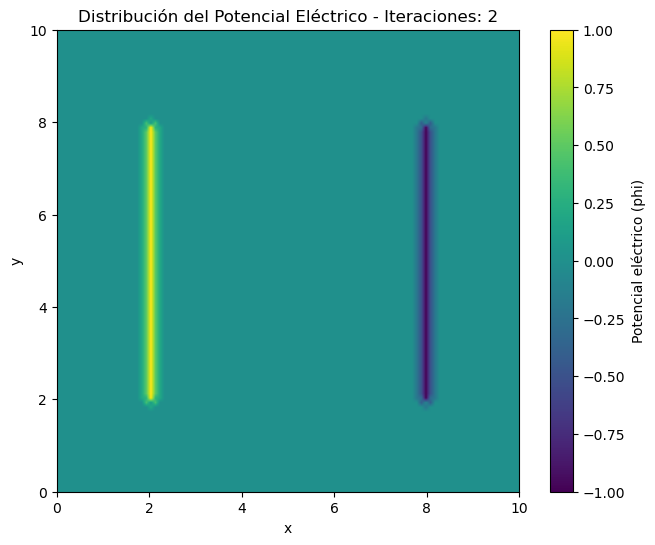

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi_relaxation_mod(N, tolerance, L, V1, V2, omega):
    # Inicializar la matriz phi con ceros
    phi = np.zeros((N + 1, N + 1), dtype=float)

    # Condiciones de frontera
    phi[int((N / L) * 2):int((N / L) * 8), int((N / L) * 2)] = V1
    phi[int((N / L) * 2):int((N / L) * 8), int((N / L) * 8)] = V2

    delta = 1.0
    iteration = 0

    # Iteración de relajación de Jacobi hasta que converja
    while delta > tolerance:
        phi_new = phi.copy()
        iteration += 1

        # Relajación de Jacobi
        phi_new[1:N, 1:N] = (1.0 + omega) * 0.25 * (phi[2:N + 1, 1:N] + phi[0:N - 1, 1:N] + phi[1:N, 2:N + 1] + phi[1:N, 0:N - 1]) - omega * phi[1:N, 1:N]

        # Reaplicar las condiciones de frontera
        phi_new[int((N / L) * 2):int((N / L) * 8), int((N / L) * 2)] = V1
        phi_new[int((N / L) * 2):int((N / L) * 8), int((N / L) * 8)] = V2

        # Control de límites para evitar valores infinitos o NaN
        phi_new = np.clip(phi_new, -1e3, 1e3)

        # Calcular el cambio máximo entre iteraciones
        delta = np.max(np.abs(phi - phi_new))
        phi = phi_new

        # Terminar si el cambio es pequeño (convergencia)
        if iteration > 1:  # límite de iteraciones para evitar que se quede en bucle infinito
            print(f"Se detuvo después de {iteration} iteraciones debido a un límite máximo.")
            break

    return phi, iteration

# Llamar al método con los parámetros
phi, num_iterations = jacobi_relaxation_mod(100, 1e-3, 10, 1, -1, 0.8)

# Graficar el resultado después de la convergencia
plt.figure(figsize=(8, 6))
plt.imshow(phi, extent=[0, 10, 0, 10], origin='lower', cmap='viridis', interpolation='bilinear')
plt.colorbar(label='Potencial eléctrico (phi)')
plt.title(f'Distribución del Potencial Eléctrico - Iteraciones: {num_iterations}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
